In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/himanshu/Downloads/NetFlix.csv')
print(df.head())
print(df.isnull().sum())
print(df.describe())

  show_id     type                                      title        director  \
0      s1  TV Show                                         3%             NaN   
1     s10    Movie                                       1920    Vikram Bhatt   
2    s100    Movie                                 3 Heroines  Iman Brotoseno   
3   s1000    Movie  Blue Mountain State: The Rise of Thadland    Lev L. Spiro   
4   s1001  TV Show                             Blue Planet II             NaN   

                                                cast         country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...          Brazil   
1  Rajneesh Duggal, Adah Sharma, Indraneil Sengup...           India   
2  Reza Rahadian, Bunga Citra Lestari, Tara Basro...       Indonesia   
3  Alan Ritchson, Darin Brooks, James Cade, Rob R...   United States   
4                                 David Attenborough  United Kingdom   

  date_added  release_year rating  duration  \
0  14-Aug-20          2020  TV-MA

In [36]:
#Distribution of Type(Movie/TV Show)

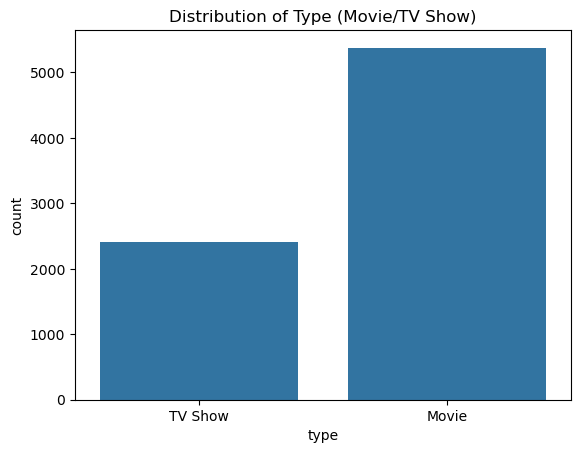

In [37]:
sns.countplot(x='type', data=df)
plt.title('Distribution of Type (Movie/TV Show)')
plt.show()

In [38]:
#Distribution of Content Ratings

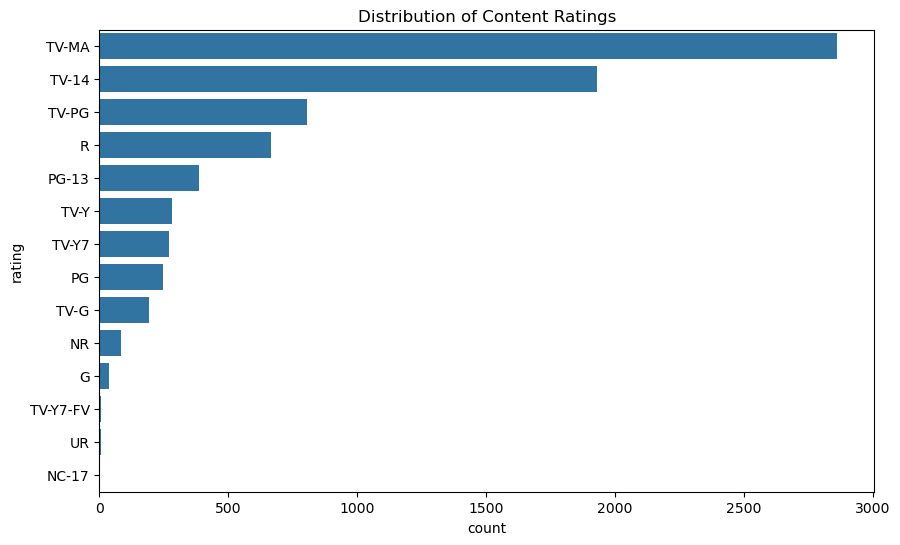

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Distribution of Content Ratings')
plt.show()

In [40]:
#Top 10 Countries by Number of Shows

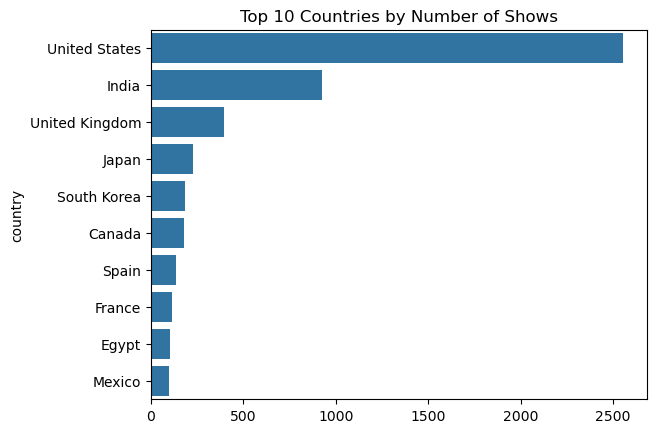

In [41]:
top_countries = df['country'].value_counts().nlargest(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Number of Shows')
plt.show()

In [42]:
#Distribution of Release Years

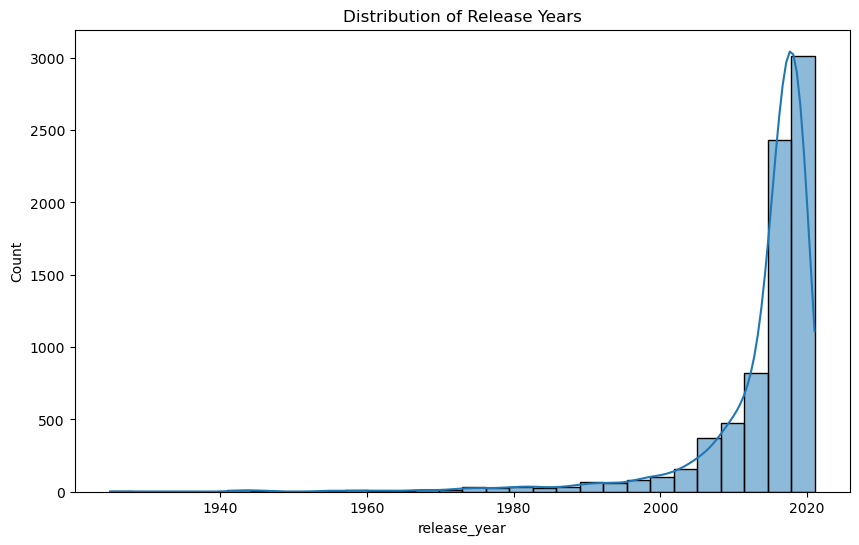

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(df['release_year'], bins=30, kde=True)
plt.title('Distribution of Release Years')
plt.show()

In [44]:
#Distribution of Movie Duration(in minutes)

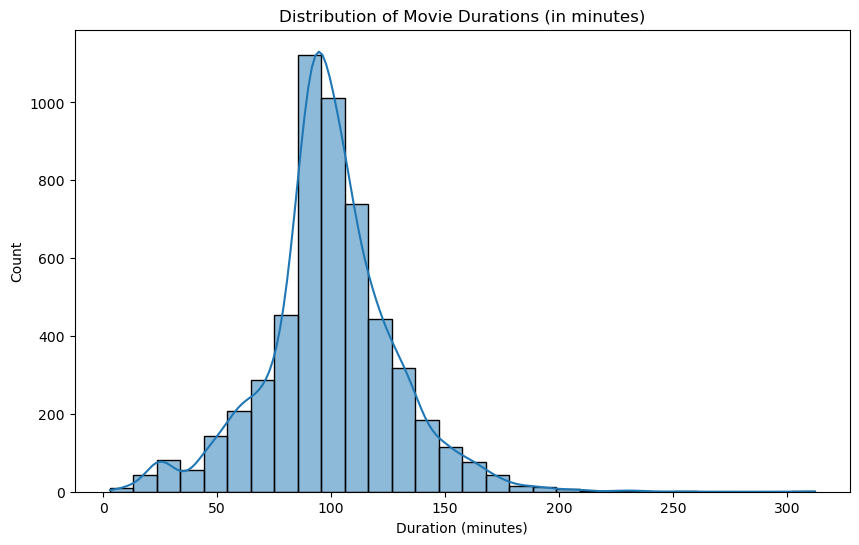

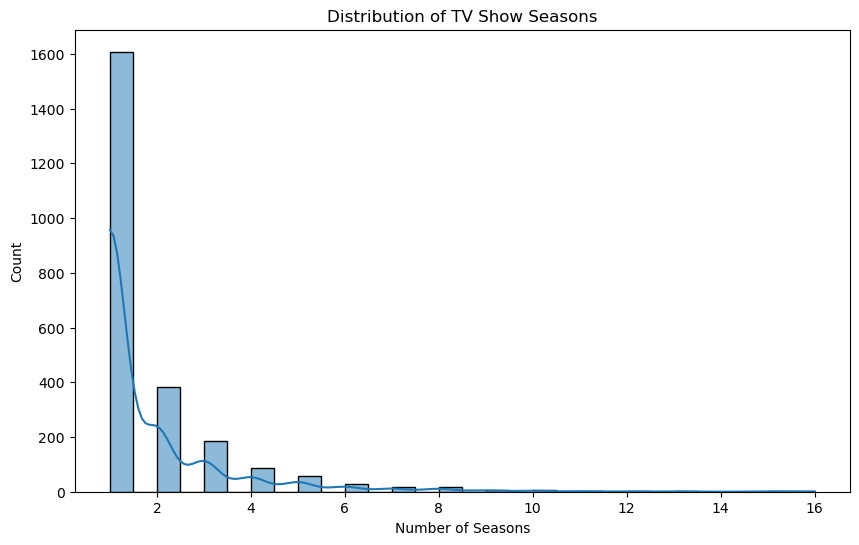

In [45]:
df['duration'] = df['duration'].astype(str)

movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

movies_durations = movies['duration'].str.extract('(\d+)')[0].dropna().astype(int)
tv_shows_seasons = tv_shows['duration'].str.extract('(\d+)')[0].dropna().astype(int)

plt.figure(figsize=(10, 6))
sns.histplot(movies_durations, bins=30, kde=True)
plt.title('Distribution of Movie Durations (in minutes)')
plt.xlabel('Duration (minutes)')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(tv_shows_seasons, bins=30, kde=True)
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Number of Seasons')
plt.show()

In [46]:
##MULTIVARIATE ANALYSIS

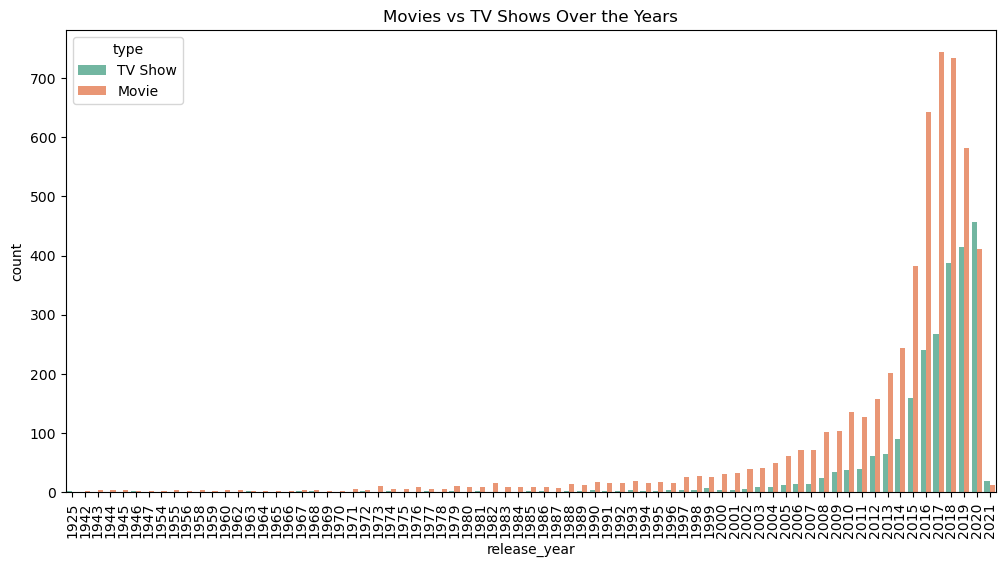

In [47]:
plt.figure(figsize=(12, 6))
sns.countplot(x='release_year', hue='type', data=df, palette='Set2')
plt.title('Movies vs TV Shows Over the Years')
plt.xticks(rotation=90)
plt.show()

In [48]:
#Top 5 countries and their distribution of Movies vs TV Shows

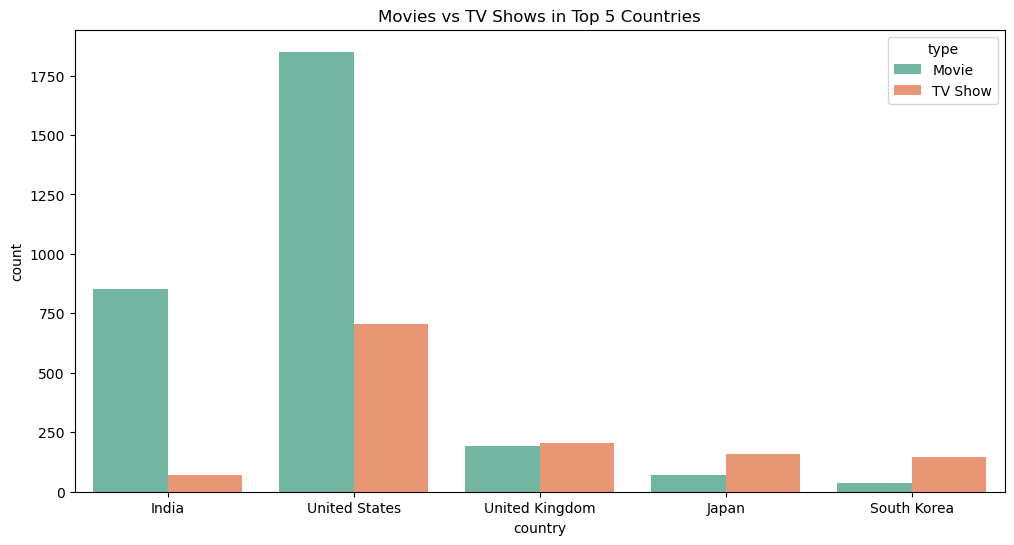

In [49]:
top_5_countries = df['country'].value_counts().nlargest(5).index
df_top_5 = df[df['country'].isin(top_5_countries)]

plt.figure(figsize=(12, 6))
sns.countplot(x='country', hue='type', data=df_top_5, palette='Set2')
plt.title('Movies vs TV Shows in Top 5 Countries')
plt.show()

In [50]:
#Top 10 Genres by Content Rating

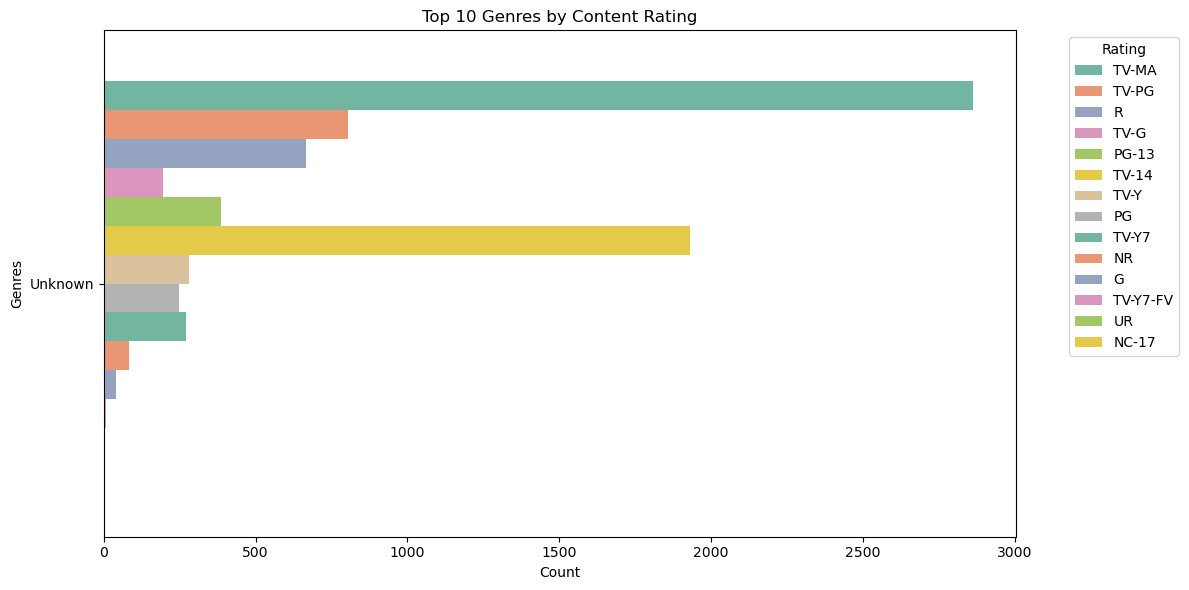

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df['genres'] = df['genres'].fillna('Unknown')  

df['genres'] = df['genres'].str.split(', ')  
df_exploded = df.explode('genres')  # Explode genres into separate rows

# Get the top 10 genres based on their total count
top_10_genres = df_exploded['genres'].value_counts().nlargest(10).index

# Filter the exploded DataFrame to include only the top 10 genres
df_top_10_genres = df_exploded[df_exploded['genres'].isin(top_10_genres)]

# Plot the count of top 10 genres by content rating
plt.figure(figsize=(12, 6))
sns.countplot(
    y='genres', 
    hue='rating', 
    data=df_top_10_genres, 
    palette='Set2', 
    order=top_10_genres  # Use the precomputed top 10 genres for ordering
)
plt.title('Top 10 Genres by Content Rating')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()